In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
cleaned_data = pd.read_csv('cleaned_CKD_dataset.csv')

In [98]:
cleaned_data.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,137.53,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [99]:
cleaned_data.info()
cleaned_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [100]:
cleaned_data.fillna(cleaned_data.median(), inplace=True)  # Filling missing values with median


In [101]:
x = cleaned_data.drop('Class', axis=1)
y = cleaned_data['Class']


In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [103]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [104]:
model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [105]:
y_pred = model.predict(x_test)


In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9875


In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Training set performance
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Test set performance
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Test Accuracy: 0.9875

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



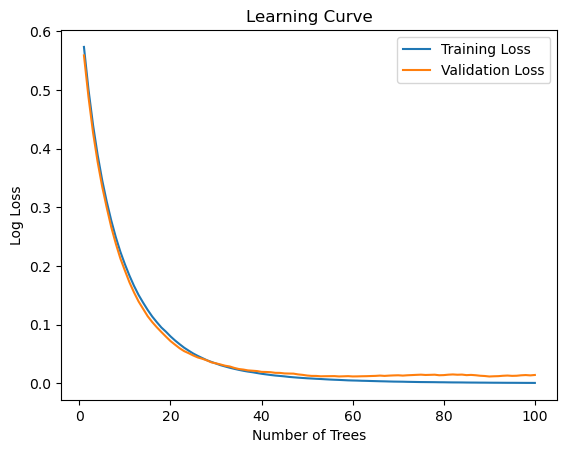

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

n_estimators = model.n_estimators
train_loss = []
test_loss = []

for i, y_pred_train in enumerate(model.staged_predict_proba(x_train)):
    train_loss.append(log_loss(y_train, y_pred_train))

for i, y_pred_test in enumerate(model.staged_predict_proba(x_test)):
    test_loss.append(log_loss(y_test, y_pred_test))

plt.plot(range(1, n_estimators + 1), train_loss, label='Training Loss')
plt.plot(range(1, n_estimators + 1), test_loss, label='Validation Loss')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


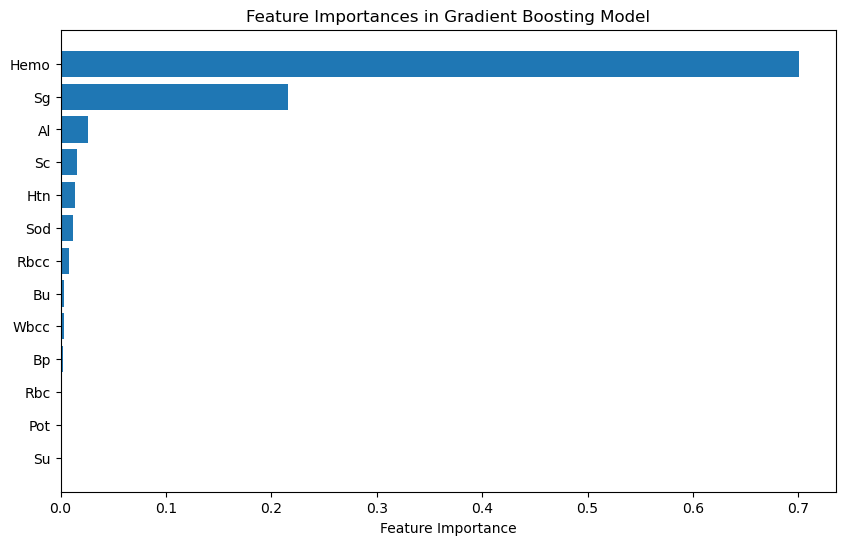

In [110]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()


In [111]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.9875 1.     0.9375 0.975  1.    ]
Mean CV Accuracy: 0.9800000000000001


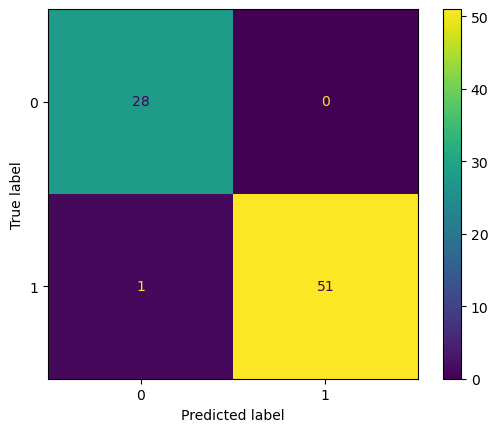

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [113]:
from sklearn.metrics import roc_auc_score

# Assuming y_test is the true labels and y_proba is the predicted probability for the positive class
y_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


AUC Score: 1.0


In [114]:
from sklearn.metrics import average_precision_score

# Assuming y_test is the true labels and y_proba is the predicted probability for the positive class
average_precision = average_precision_score(y_test, y_proba)
print("Average Precision (AP) Score:", average_precision)


Average Precision (AP) Score: 1.0


In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Assuming y_test are the true labels and y_pred are the predicted labels
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_proba)  # y_proba is the predicted probability for class 1
average_precision = average_precision_score(y_test, y_proba)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc_score)
print("Average Precision (AP) Score:", average_precision)


Precision: 1.0
Recall: 0.9807692307692307
F1 Score: 0.9902912621359223
AUC Score: 1.0
Average Precision (AP) Score: 1.0
